In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchsummary import summary

In [65]:
class CNN(nn.Module):
    def __init__(self, in_channels, out_classes):
        super(CNN, self).__init__()
        self.con1 = nn.Conv2d(in_channels = in_channels, out_channels = 8, kernel_size = (3,3), stride = (1,1), padding = (1,1))
        self.pool = nn.MaxPool2d(kernel_size = (2,2), stride = (2,2))
        self.con2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = (3,3), stride = (1,1), padding = (1,1))
        self.fc1 = nn.Linear(in_features=16*7*7, out_features=out_classes)

    def forward(self, x):
        x = F.relu(self.con1(x))
        x = self.pool(x)
        x = F.relu(self.con2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = F.softmax(self.fc1(x))

        return x

In [66]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [67]:
in_channels = 1
out_classes = 10
batch_size = 64
learning_rate = 0.001
num_epochs = 100

In [68]:
train_dataset = datasets.MNIST(root = "dataset/", train = True, transform = transforms.ToTensor(), download = True)
test_dataset = datasets.MNIST(root = "dataset/", train = False, transform = transforms.ToTensor(), download = True)
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = True)

In [69]:
model = CNN(in_channels = in_channels, out_classes = out_classes).to(device)

In [70]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [71]:
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
         MaxPool2d-2            [-1, 8, 14, 14]               0
            Conv2d-3           [-1, 16, 14, 14]           1,168
         MaxPool2d-4             [-1, 16, 7, 7]               0
            Linear-5                   [-1, 10]           7,850
Total params: 9,098
Trainable params: 9,098
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.09
Params size (MB): 0.03
Estimated Total Size (MB): 0.13
----------------------------------------------------------------


C:\Users\mayan\AppData\Local\Temp\ipykernel_22136\2295337084.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc1(x))


In [72]:
train_acc = []
test_acc = []

for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model(data)
        loss = loss_func(scores, targets)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
    print(f"At epoch {epoch+1}/{num_epochs}:-")

    num_correct = num_samples = 0
    for batch_idx, (data, targets) in enumerate(train_loader):

        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model(data)
        _, predictions = scores.max(1)
        num_correct += (predictions == targets).sum()
        num_samples += predictions.size(0)
    print(f"Train accuracy = {num_correct/num_samples*100}")
    train_acc.append(num_correct/num_samples*100)

    num_correct = num_samples = 0
    for batch_idx, (data, targets) in enumerate(test_loader):

        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model(data)
        _, predictions = scores.max(1)
        num_correct += (predictions == targets).sum()
        num_samples += predictions.size(0)
    print(f"Test accracy = {num_correct/num_samples*100}")
    test_acc.append(num_correct/num_samples*100)

C:\Users\mayan\AppData\Local\Temp\ipykernel_22136\2295337084.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc1(x))


At epoch 1/100:-
Train accuracy = 93.22167205810547
Test accracy = 93.47999572753906
At epoch 2/100:-
Train accuracy = 95.40167236328125
Test accracy = 95.63999938964844
At epoch 3/100:-
Train accuracy = 96.92166900634766
Test accracy = 97.06999969482422
At epoch 4/100:-
Train accuracy = 97.46333312988281
Test accracy = 97.38999938964844
At epoch 5/100:-
Train accuracy = 97.28666687011719
Test accracy = 97.05000305175781
At epoch 6/100:-
Train accuracy = 97.91333770751953
Test accracy = 97.67999267578125
At epoch 7/100:-
Train accuracy = 98.03333282470703
Test accracy = 97.91999816894531
At epoch 8/100:-
Train accuracy = 98.23333740234375
Test accracy = 98.00999450683594
At epoch 9/100:-
Train accuracy = 98.2750015258789
Test accracy = 97.98999786376953
At epoch 10/100:-
Train accuracy = 98.28666687011719
Test accracy = 98.28999328613281
At epoch 11/100:-
Train accuracy = 98.33000183105469
Test accracy = 98.27999114990234
At epoch 12/100:-
Train accuracy = 98.39833068847656
Test accrac

In [73]:
tr_acc = torch.tensor(train_acc, device = 'cpu').numpy()
te_acc = torch.tensor(test_acc, device = 'cpu').numpy()

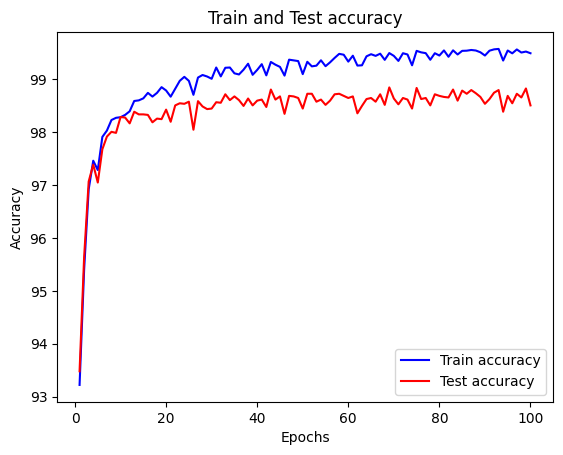

In [74]:
epchs = np.arange(num_epochs)+1

plt.plot(epchs, tr_acc, label = "Train accuracy", color = "blue")
plt.plot(epchs, te_acc, label = "Test accuracy", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train and Test accuracy")
plt.show()